<a href="https://colab.research.google.com/github/SakshamTripathi1996/CTR-for-email-campaigns/blob/main/CTR_for_email_campaigns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#import pickle
#pickle.dump()

In [3]:
!pip install ppscore

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 47 kB 3.1 MB/s 
     |████████████████████████████████| 22.3 MB 1.2 MB/s 
  Created wheel for ppscore: filename=ppscore-1.2.0-py2.py3-none-any.whl size=13068 sha256=cefb566ea53ba91f33d6038a7a71bce223cb223a3f53de7f1e8376425fefcfc2
  Stored in directory: /root/.cache/pip/wheels/d2/3c/58/2ff786414b21713edc6f4fdb54fdee89ac37bca5edd1f60634
Successfully built ppscore
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.24.2 which is incompatible.


In [4]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

 

# **Problem Statement**


Most organizations today rely on email campaigns for effective communication with users. Email communication is one of the popular ways to pitch products to users and build trustworthy relationships with them.


**Email campaigns contain different types of CTA (Call To Action). The ultimate goal of email campaigns is to maximize the Click Through Rate (CTR).**


CTR is a measure of success for email campaigns. The higher the click rate, the better your email marketing campaign is. CTR is calculated by the no. of users who clicked on at least one of the CTA divided by the total no. of users the email was delivered to.


**CTR =   No. of users who clicked on at least one of the CTA / No. of emails delivered**

CTR depends on multiple factors like design, content, personalization, etc. 


How do you design the email content effectively?
What should your subject line look like?
What should be the length of the email?
Do you need images in your email template?

As a part of the Data Science team, in this hackathon, you will build a smart system to predict the CTR for email campaigns and therefore identify the critical factors that will help the marketing team to maximize the CTR.



# Objective


Your task at hand is to build a machine learning-based approach to predict the CTR of an email campaign.



## **About the Dataset**


You are provided with the information of past email campaigns containing the email attributes like subject and body length, no. of CTA, date and time of an email, type of the audience, whether its a personalized email or not, etc and the target variable indicating the CTR of the email campaign.





campaign_id - Unique identifier of a campaign

sender - Sender of an e-mail

subject_len - No. of characters in a subject

body_len - No. of characters in an email body

mean_paragraph_len - Average no. of characters in paragraph of an email

day_of_week - Day on which email is sent

is_weekend - Boolean flag indicating if an email is sent on weekend or not

times_of_day - Times of day when email is sent: Morning, Noon, Evening

category - ategory of the product an email is related to

product - Type of the product an email is related to

no_of_CTA - No. of Call To Actions in an email

mean_CTA_len - Average no. of characters in a CTA 

is_image - No. of images in an email

is_personalised - Boolean flag indicating if an email is personalized to the user or not

is_quote - No. of quotes in an email

is_timer - Boolean flag indicating if an email contains a timer or not

is_emoticons - No. of emoticons in an email

is_discount - Boolean flag indicating if an email contains a discount or not

is_price - Boolean flag indicating if an email contains price or not

is_urgency - Boolean flag indicating if an email contains urgency or not

target_audience - Cluster label of the target audience

click_rate (Target Variable) - Click rate of an email campaign



In [5]:
# getting data
data = pd.read_csv("/content/drive/MyDrive/JOB-ATHON/train_F3fUq2S.csv")

In [6]:
# getting first 5 rows
data.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,...,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,Noon,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,...,0,0,1,0,0,0,0,0,14,0.142826


In [7]:
# info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   campaign_id         1888 non-null   int64  
 1   sender              1888 non-null   int64  
 2   subject_len         1888 non-null   int64  
 3   body_len            1888 non-null   int64  
 4   mean_paragraph_len  1888 non-null   int64  
 5   day_of_week         1888 non-null   int64  
 6   is_weekend          1888 non-null   int64  
 7   times_of_day        1888 non-null   object 
 8   category            1888 non-null   int64  
 9   product             1888 non-null   int64  
 10  no_of_CTA           1888 non-null   int64  
 11  mean_CTA_len        1888 non-null   int64  
 12  is_image            1888 non-null   int64  
 13  is_personalised     1888 non-null   int64  
 14  is_quote            1888 non-null   int64  
 15  is_timer            1888 non-null   int64  
 16  is_emo

In [8]:
#checking null values
data.isnull().sum()

campaign_id           0
sender                0
subject_len           0
body_len              0
mean_paragraph_len    0
day_of_week           0
is_weekend            0
times_of_day          0
category              0
product               0
no_of_CTA             0
mean_CTA_len          0
is_image              0
is_personalised       0
is_quote              0
is_timer              0
is_emoticons          0
is_discount           0
is_price              0
is_urgency            0
target_audience       0
click_rate            0
dtype: int64

No null values in dataset

In [9]:
#checking duplicate rows
data.duplicated().sum()

0

No duplicate rows

In [10]:
# shape of data
data.shape

(1888, 22)

In [11]:
#checking unique values of times_of_day        
data.times_of_day.unique()        

array(['Noon', 'Morning', 'Evening'], dtype=object)

In [12]:
data.day_of_week.unique( )

array([5, 4, 3, 2, 1, 0, 6])

In [13]:
data['product'].unique()

array([26, 11,  9, 10,  5, 13, 12,  6,  1, 31, 27, 42, 34, 23, 19, 16, 22,
       28,  3,  7, 18, 20, 43,  0, 21, 39,  4,  2,  8, 41, 24, 36, 25, 35,
       40, 38, 14, 33, 37, 32, 17, 15, 29])

In [14]:
data['product'].max()

43

In [15]:
data['is_timer'].unique()

array([0])

In [16]:
data['mean_paragraph_len'].unique()

array([ 39, 256,  16,  30,  27,  17,  14,  26,  36,  33,  19,  32,  29,
        22,  44,  46,  51,  48,  24,  20,  34,  37,  25,  35,  42,  50,
        18,  41,  13,  88,  86,  45,  81,  23, 160,  21,  38,  43, 111,
        11, 112,  15,  66,  89,  49,  28,  69,  47, 115,  40,  59,  31,
        55, 116,  62,   8,  57,  58,  87,  63,  54,  90,  12, 129,  53,
       125,  60,  61,  78,  65, 126,  91,  95,  52,  79,  94,  74,  10,
       108, 103, 166,  70,  71, 176,  75,  77,   4, 171, 133, 119,  73,
       107,  83,  84,   9,  68,  64, 172,   6,   7,  56, 109, 132,  98,
        72, 150, 165, 219,  85, 104, 167, 223, 208,  97,  67, 247, 234,
       286, 221, 255, 142])

In [17]:
# dropping is_timer because it has only 0
data.drop('is_timer',axis=1,inplace=True)

There are total 44 products

In [18]:
from sklearn import preprocessing
from sklearn. preprocessing import LabelEncoder
#changing categorical value to numerical values
labelEncoder= LabelEncoder()
data['times_of_day'] = labelEncoder.fit_transform(data['times_of_day'])

In [19]:
data.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,mean_CTA_len,is_image,is_personalised,is_quote,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,2,6,26,...,29,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,1,2,11,...,22,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,2,2,11,...,23,1,0,1,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,0,15,9,...,24,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,2,6,26,...,31,0,0,1,0,0,0,0,14,0.142826


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


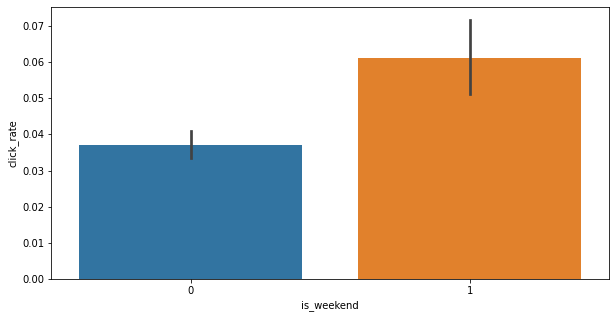

In [20]:
#click rae vs weekend
plt.figure(figsize=(10,5))
sns.barplot(data.is_weekend,data.click_rate)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


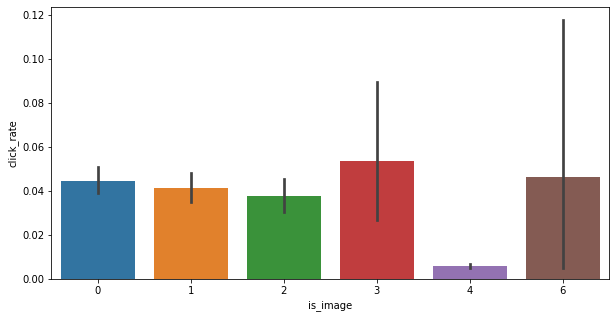

In [49]:
#click rae vs is_image
plt.figure(figsize=(10,5))
sns.barplot(data.is_image,data.click_rate)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


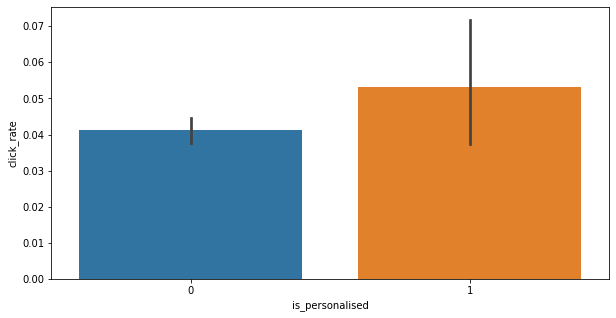

In [50]:
#click rae vs is_personalised
plt.figure(figsize=(10,5))
sns.barplot(data.is_personalised,data.click_rate)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


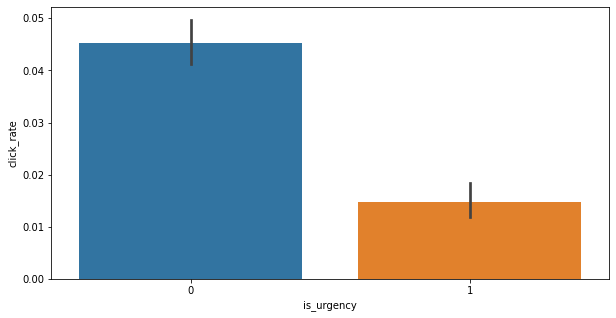

In [51]:
#click rae vs is_urgency
plt.figure(figsize=(10,5))
sns.barplot(data.is_urgency,data.click_rate)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


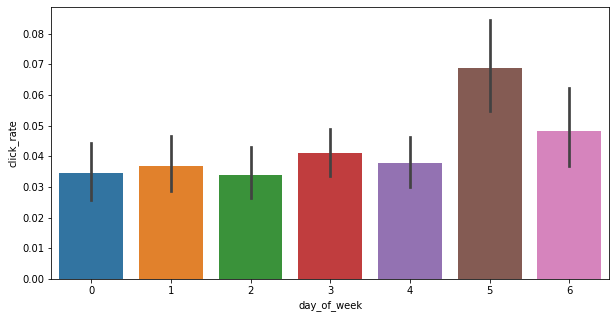

In [21]:
#click rae vs days
plt.figure(figsize=(10,5))
sns.barplot(data.day_of_week,data.click_rate)

it is clearly shown that click rate is most on saturday

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


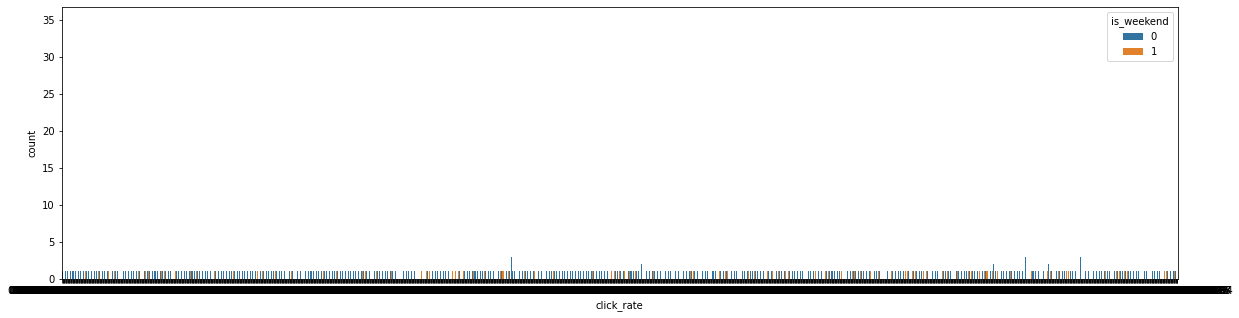

In [22]:
plt.figure(figsize=(20,5))
sns.countplot(data["click_rate"],hue=data["is_weekend"],data=data)

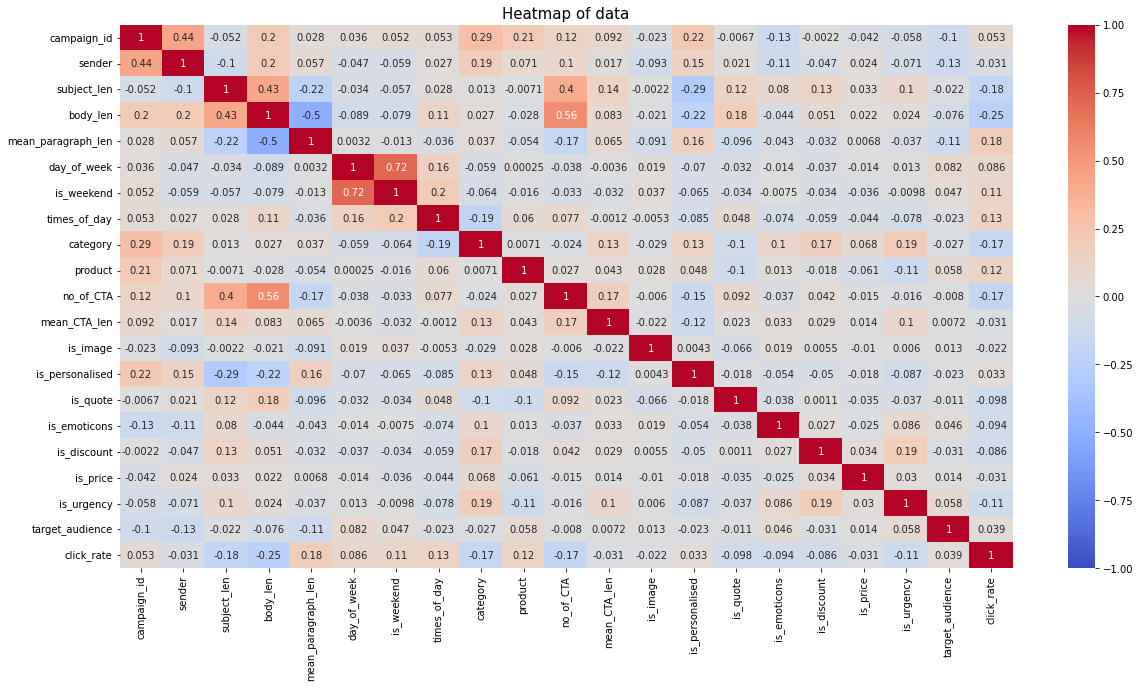

In [23]:
#checking correlation with all columns using heat map
corrmat = data.corr()
plt.rcParams["figure.figsize"] = (20,10)
sns.heatmap(corrmat, vmin=-1,annot = True,cmap='coolwarm')
plt.title("Heatmap of data",fontsize= 15)
plt.show()

In [ ]:
#importing the libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [23]:
independent = data.drop(['Response'], axis=1) #Contain all independent variables
dependent = data['Response'] #Contain Dependent variable

In [23]:
f_scores = f_classif(independent, dependent)
f_scores

In [23]:
p_values = pd.Series(f_scores[1], index= independent.columns)
p_values.plot(kind='bar', color='blue', figsize=(16,5))
plt.title('p-value scores for numerical features')
plt.show()

In [24]:
#Splitting the data into train and test data

X = data.drop(['click_rate'], axis=1) #Contain all independent variables
y = data['click_rate'] 

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.20,random_state=9)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1510, 20) (378, 20) (1510,) (378,)


In [26]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


In [27]:
reg = LinearRegression()
lasso  = Lasso()
ridge = Ridge()
tree1 = DecisionTreeRegressor(random_state=10)
rf = RandomForestRegressor(random_state=10)
gdb = GradientBoostingRegressor(random_state=10)
xgb = XGBRegressor(random_state=10)
lgbm = LGBMRegressor(random_state=10)


In [28]:
#Defining all these models
models = [
           ['LinearRegression: ',LinearRegression()],
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['PolynomialRegression: ', Ridge()],
           ['DecisionTreeRegressor: ',  DecisionTreeRegressor()],
           ['RandomForestRegressor: ',RandomForestRegressor()],
           ['GradientBoostingRegressor: ', GradientBoostingRegressor()] ,
           ['XGBRegressor: ', XGBRegressor()],
           ['LGBMRegressor: ', LGBMRegressor()]          
        ]

In [29]:
# try ploynomial regression model
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 3,include_bias=True )
X_poly = poly.fit_transform(X_train)
X_poly_test = poly.fit_transform(X_test)
lin2 = LinearRegression()
lin2.fit(X_poly, y_train)

LinearRegression()

In [35]:

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(r2_score(y_test,y_pred)*100)
mse=mean_squared_error(y_test,y_pred)
print('RMSE :',np.sqrt(mse))



63.808950471271864
RMSE : 0.055291949496400074


In [36]:
import joblib
joblib.dump(rf,"01rf.pkl")

['01rf.pkl']

In [37]:
test=pd.read_csv("/content/drive/MyDrive/JOB-ATHON/test_Bk2wfZ3.csv")

In [39]:
from sklearn import preprocessing
from sklearn. preprocessing import LabelEncoder
#changing categorical value to numerical values
labelEncoder= LabelEncoder()
test['times_of_day'] = labelEncoder.fit_transform(test['times_of_day'])

In [40]:
test.drop('is_timer',axis=1,inplace=True)

In [41]:
test_pred=rf.predict(test)

In [42]:
sub=pd.read_csv("/content/drive/MyDrive/JOB-ATHON/sample_submission_LJ2N3ZQ.csv")

In [43]:
sub

,campaign_id,click_rate
0,1889,0.043454
1,1890,0.043454
2,1891,0.043454
3,1892,0.043454
4,1893,0.043454
...,...,...
757,2646,0.043454
758,2647,0.043454
759,2648,0.043454
760,2649,0.043454


In [44]:
ser=pd.Series(test_pred)

In [ ]:
sub["click_rate"]=ser

In [45]:
sub.isnull().sum()

campaign_id    0
click_rate     0
dtype: int64

In [48]:
sub.to_csv("/content/drive/MyDrive/JOB-ATHON/submission_file_01_csv.csv",columns=["campaign_id","click_rate"],index=False)

In [38]:
#rf_01=joblib.open("01rf.pkl")

AttributeError: ignored

In [ ]:
#store all the metrics values in data frame
model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 10
    curr_model_data["Name"] = name
    if(name!='PolynomialRegression: '):
      curr_model.fit(X_train,y_train)
      curr_model_data["MAE_train"] =mean_absolute_error(y_train, curr_model.predict(X_train))
      curr_model_data["MAE_test"] =mean_absolute_error(y_test, curr_model.predict(X_test))
      curr_model_data["R2_Score_train"] = r2_score(y_train,curr_model.predict(X_train))
      curr_model_data["R2_Score_test"] = r2_score(y_test,curr_model.predict(X_test))
      curr_model_data["RMSE_Score_train"] = np.sqrt(mean_squared_error(y_train,curr_model.predict(X_train)))
      curr_model_data["RMSE_Score_test"] = np.sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))
      model_data.append(curr_model_data)
    else:
      curr_model.fit(X_poly,y_train)
      curr_model_data["MAE_train"] =mean_absolute_error(y_train, curr_model.predict(X_poly))
      curr_model_data["MAE_test"] =mean_absolute_error(y_test, curr_model.predict(X_poly_test))
      curr_model_data["R2_Score_train"] = r2_score(y_train,curr_model.predict(X_poly))
      curr_model_data["R2_Score_test"] = r2_score(y_test,curr_model.predict(X_poly_test))
      curr_model_data["RMSE_Score_train"] = np.sqrt(mean_squared_error(y_train,curr_model.predict(X_poly)))
      curr_model_data["RMSE_Score_test"] = np.sqrt(mean_squared_error(y_test,curr_model.predict(X_poly_test)))
      model_data.append(curr_model_data)

In [ ]:
metrics_df1 = pd.DataFrame(model_data)
metrics_df1